## Ejercicio

Se da el siguiente texto y se pide contar las palabra más comunes para realizar alguna tarea de análisis de texto.

#### Solo es necesario correr esta casilla en caso de no tener instalados estos paquetes o bibliotecas, convertir a formato code 
!pip install nltk
!pip install cleantext
!pip install contractions
!pip install unidecode
!pip install wordcloud
nltk.download('stopwords')
nltk.download('wordnet')


In [4]:
## Importación de bibliotecas

import nltk
import contractions
import unidecode
import re
import collections
from nltk.corpus import stopwords
from cleantext import clean
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
## Lectura de archivo Texto.txt y asignación del contenido a la variable Texto

with open('Texto.txt', 'r', encoding='utf-8') as file:
    texto = file.read()
    print(texto)

Junkfood - Food that do no good to our body. And there's no need of them in our body but still we willingly eat them because they are great in taste and easy to cook or ready to eat. Junk foods have no or very less nutritional value and irrespective of the way they are marketed, they are not healthy to consume.The only reason of their gaining popularity and increased trend of consumption is
that they are ready to eat or easy to cook foods. People, of all age groups are moving towards Junkfood as it is hassle free and often ready to grab and eat. Cold drinks, chips, noodles, pizza, burgers, French fries etc. are few examples from the great variety of junk food available in the market.
 Junkfood is the most dangerous food ever but it is pleasure in eating and it gives a great taste in mouth examples of Junkfood are kurkure and chips.. cold rings are also source of junk food... they should not be ate in high amounts as it results fatal to our body... it can be eated in a limited extend ..

In [6]:
## Función de limpieza, normaliza tipo de caracteres, expande contracciones, elimina caracteres especiales y dobles espacios

def cleanText(text):
    text = unidecode.unidecode(text) # Unifica el tipo de simbolos en el texto, por ejemplo ' y ’
    text = contractions.fix(text) # Expande las contracciones encontradas en el texto, por ejemplo 's, n't
    text = clean(text, punct=True,extra_spaces=True) # Elimina caracteres
    text = ' '.join(text.split()) # Elimina espacios
    return text.lower()

texto_limpio = cleanText(texto)
#print(texto_limpio)

In [7]:
## Instrucción para tokenization o dividir texto en palabras

palabras = texto_limpio.split()
#print(palabras)

In [8]:
## Eliminando stopwords o palabras vacias, por ejemplo, artículos, pronombres, preposiciones

stop_words = set(stopwords.words('english'))
palabras_imp = [word for word in palabras if not word in stop_words]
#print(palabras_imp)

In [9]:
## Conteo de palabras frecuentes

conteo_palabras = collections.Counter(palabras_imp)
conteo_palabras.most_common(10) # Asigne el número de palabras frecuentes a mostrar, irán de mayor a menor frecuencia

[('food', 9),
 ('junkfood', 8),
 ('junk', 6),
 ('health', 5),
 ('body', 4),
 ('eat', 4),
 ('foods', 4),
 ('fats', 4),
 ('good', 3),
 ('great', 3)]

In [20]:
## Lematización de palabras; permite obtener las raices de las palabras, así contar palabras como food y foods como una misma

lemmatizer = WordNetLemmatizer()
palabras_normalizadas = [lemmatizer.lemmatize(word) for word in palabras_imp]
#print(palabras_normalizadas)

In [11]:
## Conteo de palabras normalizadas frecuentes

conteo_palabras_l = collections.Counter(palabras_normalizadas)
conteo_palabras_l.most_common(10) 

[('food', 13),
 ('junkfood', 8),
 ('junk', 6),
 ('body', 5),
 ('amount', 5),
 ('health', 5),
 ('eat', 4),
 ('taste', 4),
 ('fat', 4),
 ('good', 3)]

(-0.5, 1599.5, 1599.5, -0.5)

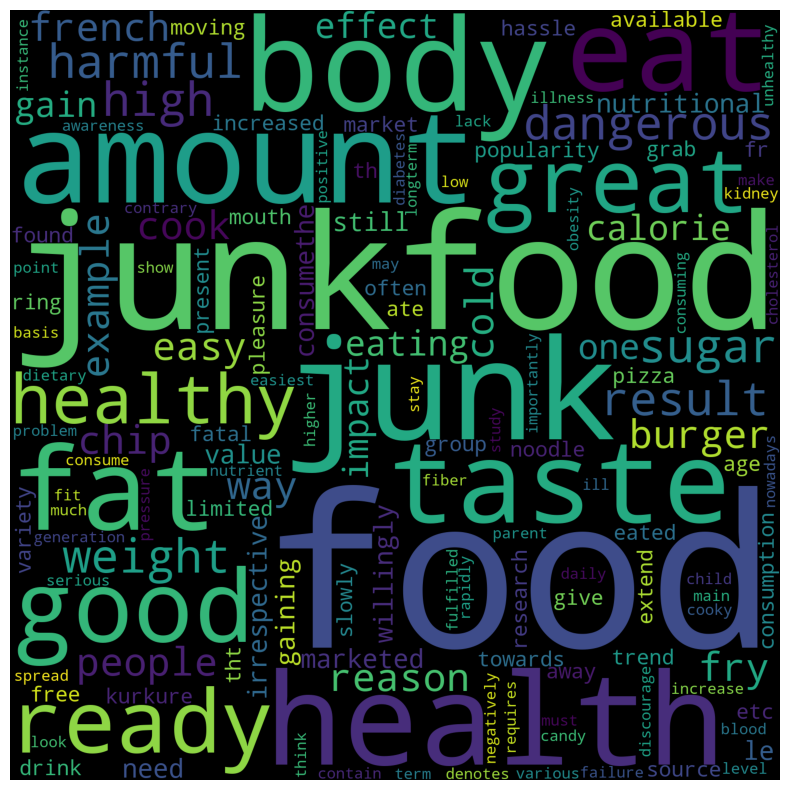

In [27]:
# Nube de palabras oscura
plt.figure(figsize = (10,10))
#Se define el numero máximo de palabras a mostras, el tamaño, collocations False evita que se muestren palabras repetidas
wc = WordCloud(max_words = 150 , width = 1600 , height = 1600, collocations=False,background_color="black").generate(' '.join(palabras_normalizadas))
plt.imshow(wc)
plt.axis('off')

(-0.5, 1599.5, 1599.5, -0.5)

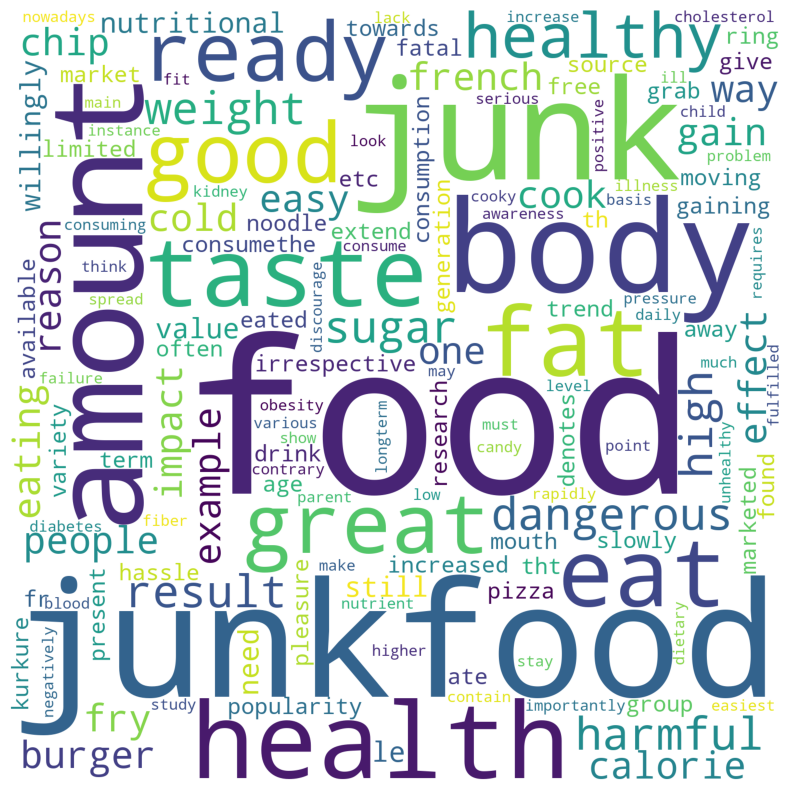

In [28]:
# Nube de palabras clara
plt.figure(figsize = (10,10))
#Se define el numero máximo de palabras a mostras, el tamaño, collocations False evita que se muestren palabras repetidas
wc = WordCloud(max_words = 150 , width = 1600 , height = 1600, collocations=False,background_color="white").generate(' '.join(palabras_normalizadas))
plt.imshow(wc)
plt.axis('off')